In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
df2 = pd.read_csv('TCGA_prad_maf.csv',sep=',')
df2

/tmp/ipykernel_12257/3152739471.py:1: DtypeWarning: Columns (87,88,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('TCGA_prad_maf.csv',sep=',')


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status,GDC_Valid_Somatic,vcf_region,vcf_info,vcf_format,vcf_tumor_gt,vcf_normal_gt
0,CCDC158,339965,BI,GRCh38,chr4,76403219,76403219,+,5'UTR,SNP,...,NaN,NaN,False,Unknown,False,chr4:76403219:.:C:T,"ACGTNacgtnMINUS=0,1,0,0,0,0,24,0,2,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:44,3:0.067:1:2:0.667:1523,98:20:24","0/0:39,0:0:0:0:.:1276,0:19:20"
1,PCDHA4,56144,BI,GRCh38,chr5,140808044,140808044,+,Missense_Mutation,SNP,...,NaN,COSM1433779;COSM72091,True,Unknown,False,chr5:140808044:.:C:T,"ACGTNacgtnMINUS=0,21,0,1,0,0,16,0,2,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:94,6:0.045:3:3:0.5:2784,191:54:40","0/0:96,0:0:0:0:.:2701,0:40:56"
2,SLU7,10569,BI,GRCh38,chr5,160407869,160407869,+,Intron,SNP,...,NonExonic;bitgt,NaN,False,Unknown,False,chr5:160407869:.:G:A,"ACGTNacgtnMINUS=4,0,21,0,0,0,0,13,0,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:69,6:0.068:2:4:0.333:1930,188:36:33","0/0:54,0:0:0:0:.:1476,0:24:30"
3,GOLGA7,51125,BI,GRCh38,chr8,41511759,41511759,+,3'Flank,SNP,...,bitgt,NaN,False,Unknown,False,chr8:41511759:.:C:T,"ACGTNacgtnMINUS=0,4,0,0,0,1,36,0,0,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:81,7:0.072:7:0:0:2173,194:39:42","0/0:60,0:0:0:0:.:1512,0:32:28"
4,KCTD19,146212,BI,GRCh38,chr16,67301815,67301815,+,Missense_Mutation,SNP,...,NaN,COSM3672302,True,Unknown,False,chr16:67301815:rs763382763:C:T,"ACGTNacgtnMINUS=0,53,0,1,0,1,98,0,4,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:269,16:0.042:11:5:0.313:7378,494:112:157","0/0:249,0:0:0:0:.:6501,0:110:139"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35135,GLRA2,2742,BI,GRCh38,chrX,14581254,14581261,+,Frame_Shift_Del,DEL,...,NaN,NaN,True,Unknown,False,chrX:14581253:.:ATGACTCCC:A,ECNT=1;HCNT=2;MAX_ED=.;MIN_ED=.;NLOD=20.77;TLO...,GT:AD:AF:ALT_F1R2:ALT_F2R1:QSS:REF_F1R2:REF_F2R1,"0/1:36,26:0.426:17:9:1082,768:20:16","0/0:78,0:0:0:0:2375,0:49:29"
35136,PHKA2,5256,BI,GRCh38,chrX,18894338,18894338,+,Missense_Mutation,SNP,...,NaN,COSM371211,True,Unknown,False,chrX:18894338:rs754449318:C:T,"ACGTNacgtnMINUS=0,5,0,2,0,0,6,0,1,0;ACGTNacgtn...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:41,4:0.086:0:4:1:1073,133:29:12","0/0:42,0:0:0:0:.:1236,0:21:21"
35137,CYBB,1536,BI,GRCh38,chrX,37782121,37782121,+,Missense_Mutation,SNP,...,NaN,NaN,True,Unknown,False,chrX:37782121:.:G:C,"ACGTNacgtnMINUS=0,2,12,0,0,0,1,6,0,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:46,5:0.091:1:4:0.2:1449,170:26:20","0/0:55,0:0:0:0:.:1818,0:22:33"
35138,AWAT1,158833,BI,GRCh38,chrX,70238212,70238212,+,Missense_Mutation,SNP,...,NaN,NaN,True,Unknown,False,chrX:70238212:.:G:T,"ACGTNacgtnMINUS=0,0,9,1,0,0,0,1,2,0;ACGTNacgtn...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:27,5:0.179:2:3:0.4:863,162:17:10","0/0:42,0:0:0:0:.:1389,0:28:14"


In [3]:
dfMAF = df2[['Hugo_Symbol','Tumor_Sample_Barcode']]
dfMAF

,Hugo_Symbol,Tumor_Sample_Barcode
0,CCDC158,TCGA-G9-6353-01A-11D-1961-08
1,PCDHA4,TCGA-G9-6353-01A-11D-1961-08
2,SLU7,TCGA-G9-6353-01A-11D-1961-08
3,GOLGA7,TCGA-G9-6353-01A-11D-1961-08
4,KCTD19,TCGA-G9-6353-01A-11D-1961-08
...,...,...
35135,GLRA2,TCGA-V1-A9OH-01A-11D-A41K-08
35136,PHKA2,TCGA-V1-A9OH-01A-11D-A41K-08
35137,CYBB,TCGA-V1-A9OH-01A-11D-A41K-08
35138,AWAT1,TCGA-V1-A9OH-01A-11D-A41K-08


In [4]:
genes = ["ITGAM","ESR1","GNAI1","PIK3R1","FOXA1","GNB1","SMAD4","C3","FAM20A","FAM20C","KRAS","GNAL","SP3"]
genes_all = ["MEF2C","MAPK1","STAT3","ATM","ZNF263","ITGAM","ESR1","GNAI1","PIK3R1","FOXA1","GNB1","SMAD4","C3","FAM20A","FAM20C","KRAS","GNAL","SP3","ACTG1","CTNNB1","PTK2","RHOC","ACTB","CDC42","CTNNA1","H4C1","ITGB1","JUN","JUND","RAC1","RELA","RHOA","YY1","SRF","AKT1","CALM3","CREB1","CREBBP","EGFR","EP300","GNAI2","GNAI3","HIF1A","MAPK3","NFKB1","PIK3CA","PIK3CB","PLCG2","PRKACA","RHOB","RXRA","RXRG","SRC","STAT1","TP53","AR","EGR1","GNG2","HRAS","MYC","PRKACB","PRKACG","SP1","TCF4","ARRB1","ARRB2","GRK2","GRK3","RPS27A","UBA52","UBB","UBC","E2F1","FYN","GNAQ","HDAC2","FOS","TAF1","CEBPB","CTCF","PRKCB","RAD21","SPI1","SREBF1","TCF12","REST","STAT2","SUZ12","TFAP2A","CTBP2","PAX5","USF1","GABPA","GNG13","GNG7"]

In [5]:
dfMAF_clust = dfMAF[dfMAF["Hugo_Symbol"].isin(genes)]
dfMAF_all = dfMAF[dfMAF["Hugo_Symbol"].isin(genes_all)]
dfMAF

,Hugo_Symbol,Tumor_Sample_Barcode
0,CCDC158,TCGA-G9-6353-01A-11D-1961-08
1,PCDHA4,TCGA-G9-6353-01A-11D-1961-08
2,SLU7,TCGA-G9-6353-01A-11D-1961-08
3,GOLGA7,TCGA-G9-6353-01A-11D-1961-08
4,KCTD19,TCGA-G9-6353-01A-11D-1961-08
...,...,...
35135,GLRA2,TCGA-V1-A9OH-01A-11D-A41K-08
35136,PHKA2,TCGA-V1-A9OH-01A-11D-A41K-08
35137,CYBB,TCGA-V1-A9OH-01A-11D-A41K-08
35138,AWAT1,TCGA-V1-A9OH-01A-11D-A41K-08


In [6]:
patients = list(pd.unique(dfMAF_clust["Tumor_Sample_Barcode"]))
patients_all = list(pd.unique(dfMAF_all["Tumor_Sample_Barcode"]))

In [14]:
shape = (len(genes_all),len(patients_all))
data_plot_all = np.empty(shape, dtype=float)
for g in range(len(genes_all)):
    for p in range(len(patients_all)):
            if len(dfMAF.loc[(dfMAF['Hugo_Symbol'] == genes_all[g]) & (dfMAF["Tumor_Sample_Barcode"] == patients_all[p])]) == 0:
                data_plot_all[g,p] = 0
            else:
                data_plot_all[g,p] = 1
                
data_plot_sorted_all = np.empty(shape, dtype=float)
pat = []
for g in range(len(genes_all)):
    for p in range(len(patients_all)):
        if data_plot_all[g,p] == 1 and p not in pat:
            pat.append(p)
print(pat)
j = 0
for i in pat:
    data_plot_sorted_all[:,j] = data_plot_all[:,i]    
    j=j+1

data_plot_all

[26, 159, 142, 8, 64, 81, 107, 135, 9, 25, 28, 35, 71, 75, 79, 90, 110, 115, 121, 123, 144, 150, 152, 170, 176, 188, 190, 193, 195, 138, 3, 50, 55, 177, 16, 48, 202, 77, 91, 63, 0, 1, 2, 10, 17, 19, 20, 29, 34, 38, 57, 62, 67, 87, 97, 98, 106, 128, 131, 136, 143, 156, 157, 163, 164, 169, 186, 200, 201, 108, 141, 30, 31, 54, 74, 84, 189, 154, 39, 85, 124, 23, 114, 42, 100, 162, 45, 58, 72, 104, 116, 120, 93, 140, 151, 171, 172, 96, 204, 32, 165, 174, 139, 196, 134, 60, 178, 197, 94, 130, 153, 184, 198, 27, 40, 101, 125, 179, 180, 4, 24, 65, 86, 182, 194, 51, 173, 133, 92, 21, 59, 80, 82, 129, 73, 132, 145, 160, 166, 49, 61, 148, 41, 147, 168, 175, 181, 46, 161, 7, 11, 13, 14, 18, 22, 33, 36, 47, 52, 56, 66, 68, 69, 70, 76, 83, 99, 105, 109, 112, 117, 122, 126, 146, 149, 155, 158, 167, 183, 185, 187, 191, 203, 53, 78, 5, 113, 127, 89, 192, 199, 6, 15, 43, 88, 102, 12, 37, 95, 103, 119, 137, 111, 118, 44]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
shape = (len(genes),len(patients))
data_plot = np.empty(shape, dtype=float)
for g in range(len(genes)):
    for p in range(len(patients)):
            if len(dfMAF.loc[(dfMAF['Hugo_Symbol'] == genes[g]) & (dfMAF["Tumor_Sample_Barcode"] == patients[p])]) == 0:
                data_plot[g,p] = 0
            else:
                data_plot[g,p] = 1
                
data_plot_sorted = np.empty(shape, dtype=float)
pat = []
for g in range(len(genes)):
    for p in range(len(patients)):
        if data_plot[g,p] == 1 and p not in pat:
            pat.append(p)
print(pat)
j = 0
for i in pat:
    data_plot_sorted[:,j] = data_plot[:,i]    
    j=j+1

[3, 21, 23, 34, 56, 7, 20, 62, 30, 35, 26, 27, 0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 14, 17, 18, 24, 25, 28, 33, 36, 37, 38, 43, 44, 45, 48, 49, 51, 52, 53, 54, 55, 57, 59, 60, 61, 39, 46, 47, 13, 15, 41, 16, 22, 29, 31, 58, 50, 19, 32, 42, 11, 40]


In [9]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    #ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im

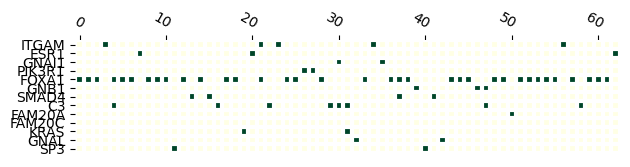

In [10]:
fig, ax = plt.subplots()

im = heatmap(data_plot,genes,patients,ax=ax,
                   cmap="YlGn", cbarlabel="Mutation")

fig.tight_layout()
plt.show()

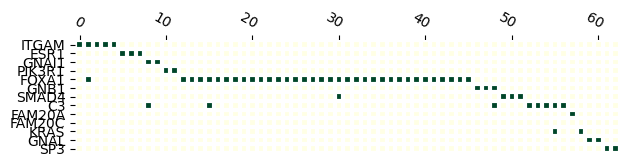

In [11]:
fig, ax = plt.subplots()

im = heatmap(data_plot_sorted,genes,patients,ax=ax,
                   cmap="YlGn", cbarlabel="Mutation")

fig.tight_layout()
plt.show()

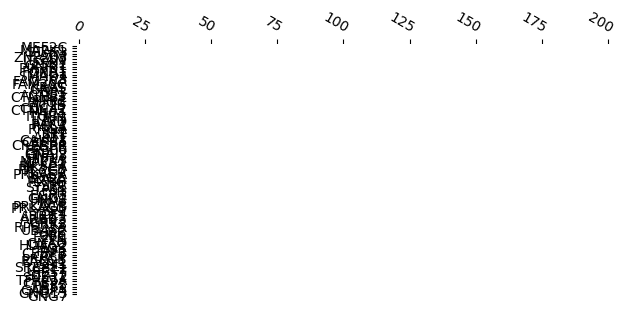

In [18]:
fig, ax = plt.subplots()

im = heatmap(data_plot_all,genes_all,patients_all,ax=ax,
                   cmap="YlGn", cbarlabel="Mutation")

fig.tight_layout()
plt.show()

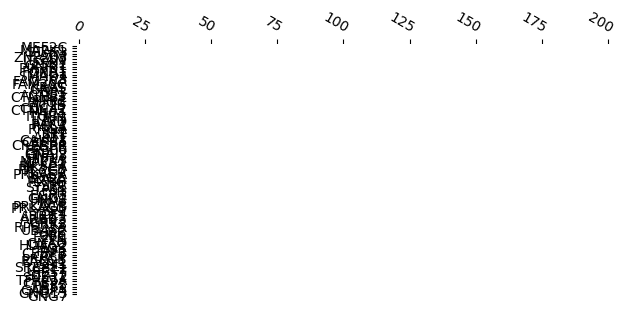

In [16]:
fig, ax = plt.subplots()

im = heatmap(data_plot_sorted_all,genes_all,patients_all,ax=ax,
                   cmap="YlGn", cbarlabel="Mutation")

fig.tight_layout()
plt.show()